In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel(r"C:\Users\vatch\Downloads\archive (13)\Wine.xlsx")
print("Shape of dataset:", df.shape)
print("First few rows:")
print(df.head())

Shape of dataset: (178, 14)
First few rows:
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                        

In [9]:
if df[df.columns[0]].dtype == 'object' or df[df.columns[0]].nunique() <= 10:

    y = df.iloc[:, 0]
    X = df.iloc[:, 1:]
else:
    X = df
    y = None

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]
 [ 3.05025392  2.12240111]
 [ 2.44908967  1.17485013]
 [ 2.05943687  1.60896307]
 [ 2.5108743   0.91807096]
 [ 2.75362819  0.78943767]
 [ 3.47973668  1.30233324]
 [ 1.7547529   0.61197723]
 [ 2.11346234  0.67570634]
 [ 3.45815682  1.13062988]
 [ 4.31278391  2.09597558]
 [ 2.3051882   1.66255173]
 [ 2.17195527  2.32730534]
 [ 1.89897118  1.63136888]
 [ 3.54198508  2.51834367]
 [ 2.0845222   1.06113799]
 [ 3.12440254  0.78689711]
 [ 1.08657007  0.24174355]
 [ 2.53522408 -0.09184062]
 [ 1.64498834 -0.51627893]
 [ 1.76157587 -0.31714893]
 [ 0.9900791   0.94066734]
 [ 1.77527763  0.68617513]
 [ 1.23542396 -0.08980704]
 [ 2.18840633  0.68956962]
 [ 2.25610898  0.19146194]
 [ 2.50022003  1.24083383]
 [ 2.67741105  1.47187365]
 [ 1.62857912  0.05270445]
 [ 1.90269086  1.63306043]
 [ 1.41038853  0.69793432]
 [ 1.90382623  0.17671095]
 [ 1.38486223  0.65863985]
 

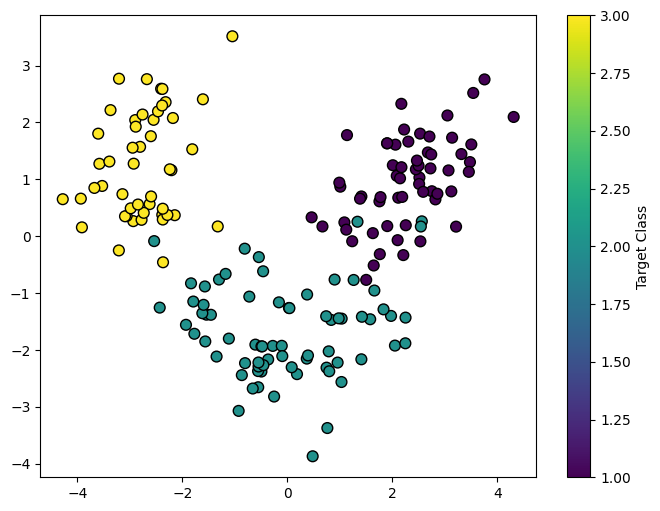

In [14]:
plt.figure(figsize=(8, 6))
if y is not None:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
    plt.colorbar(label='Target Class')
else:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=60)


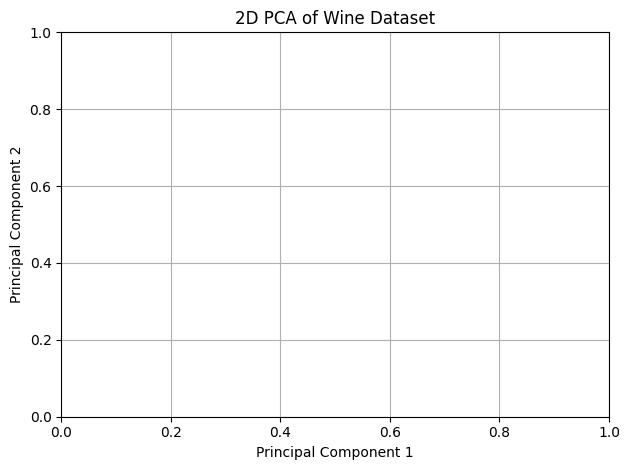

In [15]:
plt.title("2D PCA of Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()
print(total_variance)

0.5540633835693527


In [19]:
if total_variance >= 0.8:
    print("✅ PCA preserved most of the variance. A 2D visualization is highly meaningful.")
else:
    print("⚠️ Less variance is retained. Consider using more components for better representation.")

⚠️ Less variance is retained. Consider using more components for better representation.
